/var/folders/9b/j80hsvl1701f43nhrmrd__mr0000gn/T/ipykernel_37473/2504535919.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(list(np.binary_repr(num).zfill(m))).astype(np.bool)


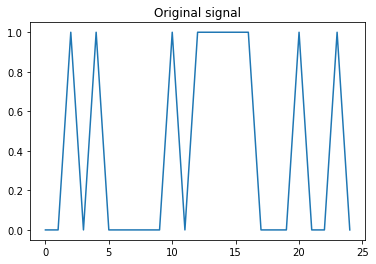

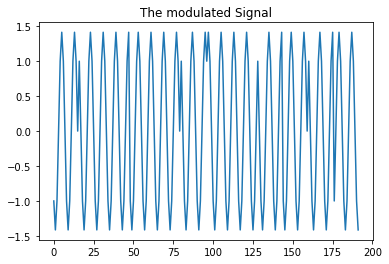

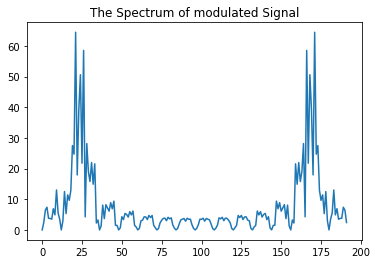

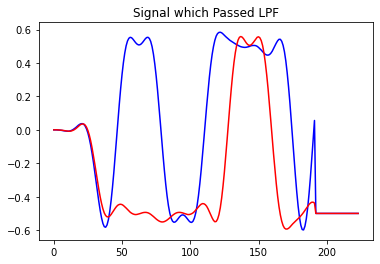

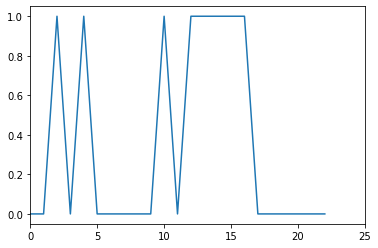

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 23 18:32:03 2023

@author: ranshuai
"""

# QPSK
import numpy as np
from matplotlib import pyplot as plt
from scipy import fft
from scipy import signal
def bin_array(num, m):
    """Convert a positive integer num into an m-bit bit vector"""
    return np.array(list(np.binary_repr(num).zfill(m))).astype(np.bool)
# import 24 bit digital data
id_num = 2633609
Nbits = 24
tx_bin = bin_array(id_num, Nbits) # 转换后的24位二进制学号
bit_len = 16 #
# When transmitting the last signal, errors always occur, 
# so I add several zero values to the original signal, making the last signal the third last signal.
# tx_bin = np.append(tx_bin,0)
# tx_bin = np.append(tx_bin,0)
# tx_bin = np.append(tx_bin,0)
# Nbits = Nbits + 3
##############################################
fc = 0.125 # normalized frequency
tx_bin = np.append(tx_bin,False)
s = np.copy(tx_bin) # s就是原始信号
tx_mod = np.empty(0) # 被调制之后的信号
plt.figure()
plt.plot(tx_bin)
plt.title("Original signal")
plt.show()

############### modulation###############
for i in range(0,Nbits,2):
    for j in range(bit_len):
        tx_mod = np.append(tx_mod,(2*s[i]-1)*np.cos(2*np.pi*fc*(i*bit_len+j))+(2*s[i+1]-1)*np.sin(2*np.pi*fc*(i*bit_len+j)))# 把信号追加到tx_mod中

plt.figure()
plt.plot(tx_mod)
plt.title("The modulated Signal")
plt.show()

plt.figure()
plt.plot(np.abs(fft.fft(tx_mod))) #因为是傅立叶变换是 complex quantity 复数 方便在spectrum analyser上查看
plt.title("The Spectrum of modulated Signal")
plt.show()


##########Low Pass Filter###############
numtaps = 64
delays = np.arange(numtaps) # 为了画载波的波形
b1 = signal.firwin(numtaps, 0.1) # 滤波器的系数
#########demodulation#################
rx_demod_cos = np.empty(0)
rx_demod_sin = np.empty(0)
t = 0
for i in range(0,Nbits,2):
    for j in range(bit_len):
        rx_demod_cos = np.append(rx_demod_cos,tx_mod[t]*np.cos(2*np.pi*fc*t))
        rx_demod_sin = np.append(rx_demod_sin,tx_mod[t]*np.sin(2*np.pi*fc*t))
        t += 1

rx_filt_cos = signal.lfilter(b1,1,rx_demod_cos)
rx_filt_cos = np.append(rx_filt_cos,-np.ones(numtaps//2)/2)
rx_filt_sin = signal.lfilter(b1,1,rx_demod_sin)
rx_filt_sin = np.append(rx_filt_sin,-np.ones(numtaps//2)/2)

plt.figure()
plt.plot(rx_filt_cos,color = "b")
plt.plot(rx_filt_sin,color = "r")
plt.title("Signal which Passed LPF")
plt.show()

rx_bin = np.empty(0)
for i in range(0,Nbits,2):
    t = (i+1)*bit_len//2 + numtaps//2
    rx_bin = np.append(rx_bin,rx_filt_cos[t] > 0.1)
    rx_bin = np.append(rx_bin,rx_filt_sin[t] > 0.1)

rx_bin = rx_bin[:-1]
plt.figure()
plt.plot(rx_bin)
plt.xlim(0,25)
plt.show()






